# Jane Street Puzzle - June 2024 - Altered States 2

## Problem Statement

<div class="center">
<img src="images/altered_states_june-2024.png" alt="altered_states_june-2024.png">
</div>

A little while ago we asked solvers to smoosh as many of the 50 U.S. states into a 5-by-5 grid as possible.

Now we’re at it again! Once more, your goal is to score as many points as possible by placing U.S. states in a 5-by-5 grid.

States can be spelled by making King’s moves from square to square. (See the example.)
This time around, the score for a state is its population in the 2020 U.S. Census. So, for example, CALIFORNIA scores 39,538,223 points.
In the true spirit of the puzzle’s title, you may “alter” the name of a state by at most one letter. “Altering” a state means replacing a letter with another letter. (So NEWPORK, NEWYORF, and NEWYORK would all score for NEWYORK, but NEWYRK and NEWYROK would not.)
If a state appears multiple times in your grid, it only scores once.
The 3-by-3 example above scores 32,913,047 points, for Illinois (Inlinois), Ohio, Utah (Atah), Iowa (Ioha), and Idaho (Ieaho).

To send in your entry, please render your grid as one unbroken 25-digit string by concatenating the rows. (The 3-by-3 grid from the example would be “thoainesl”.)

To qualify for the leaderboard, you entry must score at least half of the available points. (So: at least 165,379,868.)

Beyond that requirement, the local tourism authority has established awards for particularly special boards, using the following citations:

20S: visits at least 20 states 200M: scores at least 200 million PA: visits Pennsylvania M8: contains all 8 states that being with an M 4C: contains the “Four Corners” states NOCAL: avoids California C2C: contains a coast-to-coast1 chain

“Coast-to-coast” means “East coast to West coast”. States in the chain must have positive joint border length (e.g. Arizona-to-Colorado would not count as a “step” in the chain); “East coast” states range from Florida (southernmost) to Maine (northernmost). 

## Solution

For this problem, I initially spent some time trying to figure out which words were likely to be in similar regions and which letters were most likely to be used. I manually started to generate a grid by mixing the letters from CALIFORNIA and FLORIDA as those share many letters and can lead to a high score. I then started to add some states using letters R and G (VIRGINIA, GEORGIA, OREGON) while keeping space on the side for NEW YORK and TEXAS. I quickly realised that I would easily find a solution without any coding.

In [1]:
from functools import cache
from collections import defaultdict, Counter
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
scores = {
    "California": 39538223,
    "Texas": 29145505,
    "Florida": 21538187,
    "New York": 20201249,
    "Pennsylvania": 13002700,
    "Illinois": 12812508,
    "Ohio": 11799448,
    "Georgia": 10711908,
    "North Carolina": 10439388,
    "Michigan": 10077331,
    "New Jersey": 9288994,
    "Virginia": 8631393,
    "Washington": 7705281,
    "Arizona": 7151502,
    "Massachusetts": 7029917,
    "Tennessee": 6910840,
    "Indiana": 6785528,
    "Maryland": 6177224,
    "Missouri": 6154913,
    "Wisconsin": 5893718,
    "Colorado": 5773714,
    "Minnesota": 5706494,
    "South Carolina": 5118425,
    "Alabama": 5024279,
    "Louisiana": 4657757,
    "Kentucky": 4505836,
    "Oregon": 4237256,
    "Oklahoma": 3959353,
    "Connecticut": 3605944,
    "Utah": 3271616,
    "Iowa": 3190369,
    "Nevada": 3104614,
    "Arkansas": 3011524,
    "Mississippi": 2961279,
    "Kansas": 2937880,
    "New Mexico": 2117522,
    "Nebraska": 1961504,
    "Idaho": 1839106,
    "West Virginia": 1793716,
    "Hawaii": 1455271,
    "New Hampshire": 1377529,
    "Maine": 1362359,
    "Rhode Island": 1097379,
    "Montana": 1084225,
    "Delaware": 989948,
    "South Dakota": 886667,
    "North Dakota": 779094,
    "Alaska": 733391,
    "Vermont": 643077,
    "Wyoming": 576851
}

In [3]:
# Number of unique letters per word
n_unique_letters = defaultdict(int)
for word in scores.keys():
    tmp = set()
    for char in word:
        if char not in tmp:
            n_unique_letters[word] += 1
            tmp.add(char)
n_unique_letters

defaultdict(int,
            {'California': 8,
             'Texas': 5,
             'Florida': 7,
             'New York': 8,
             'Pennsylvania': 9,
             'Illinois': 6,
             'Ohio': 4,
             'Georgia': 7,
             'North Carolina': 11,
             'Michigan': 7,
             'New Jersey': 8,
             'Virginia': 6,
             'Washington': 9,
             'Arizona': 7,
             'Massachusetts': 8,
             'Tennessee': 4,
             'Indiana': 5,
             'Maryland': 7,
             'Missouri': 6,
             'Wisconsin': 6,
             'Colorado': 6,
             'Minnesota': 8,
             'South Carolina': 12,
             'Alabama': 5,
             'Louisiana': 7,
             'Kentucky': 8,
             'Oregon': 6,
             'Oklahoma': 7,
             'Connecticut': 8,
             'Utah': 4,
             'Iowa': 4,
             'Nevada': 5,
             'Arkansas': 6,
             'Mississippi': 4,
             'Ka

In [4]:
# Count per letter

letter_counts = defaultdict(int)
for word in scores.keys():
    for char in word:
        letter_counts[char.upper()] += 1
letter_counts

defaultdict(int,
            {'C': 12,
             'A': 61,
             'L': 15,
             'I': 44,
             'F': 2,
             'O': 36,
             'R': 22,
             'N': 43,
             'T': 19,
             'E': 28,
             'X': 2,
             'S': 32,
             'D': 11,
             'W': 11,
             ' ': 10,
             'Y': 6,
             'K': 10,
             'P': 4,
             'V': 5,
             'H': 15,
             'G': 8,
             'M': 14,
             'J': 1,
             'Z': 1,
             'U': 8,
             'B': 2})

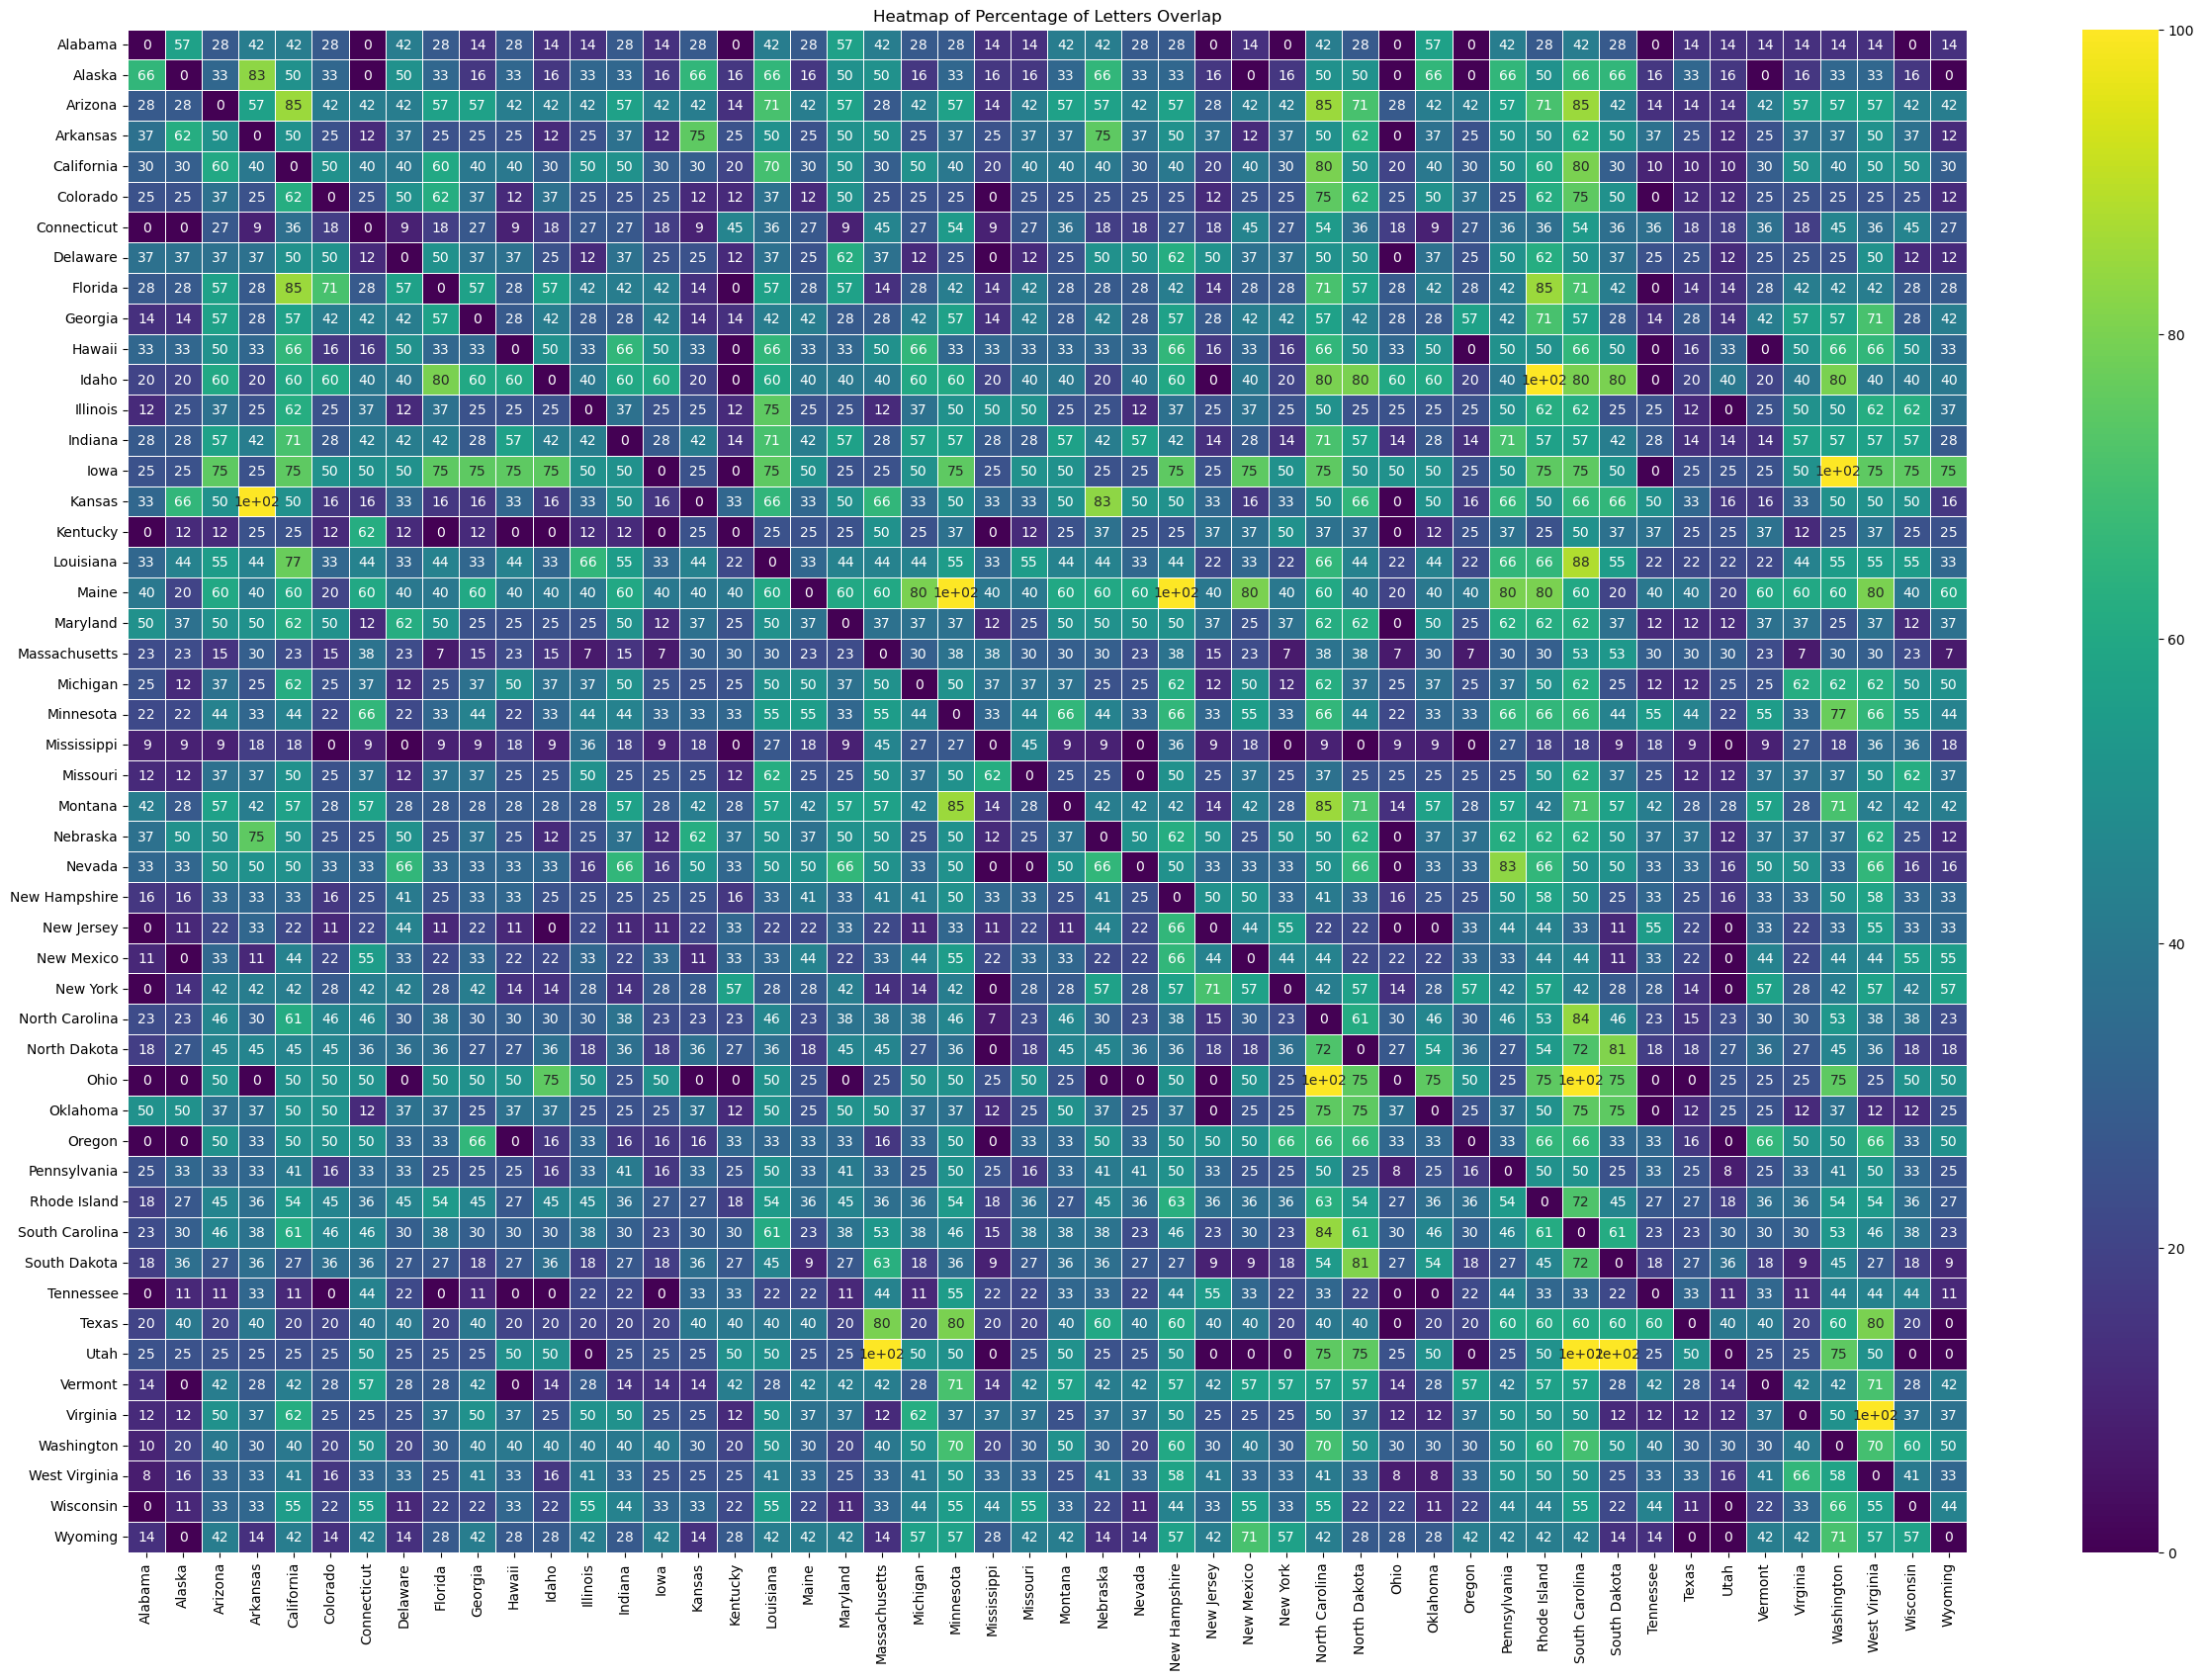

In [5]:
# Get percentage of matching letters between pairs of words

# List of US states
states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado",
    "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho",
    "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine",
    "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi",
    "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey",
    "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio",
    "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina",
    "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia",
    "Washington", "West Virginia", "Wisconsin", "Wyoming"
]

# Normalize state names
def normalize(name):
    return name.replace(" ", "").upper()

# Normalize all state names
normalized_states = [normalize(state) for state in states]

# Create a matrix to hold the percentage of common letters
n = len(states)
percentage_overlap_matrix = [[0]*n for _ in range(n)]

# Populate the matrix with percentages of common letters
for i in range(n):
    for j in range(n):
        if i != j:  # Avoid comparing a state with itself
            # Count frequency of each letter in both state names
            count_i = Counter(normalized_states[i])
            count_j = Counter(normalized_states[j])

            # Total letters in state i
            total_letters_i = sum(count_i.values())

            # Calculate the sum of the minimum occurrences of each letter found in both states
            common_letters_sum = sum(min(count_i[letter], count_j[letter]) for letter in count_i)

            # Calculate percentage overlap
            percentage_overlap_matrix[i][j] = int((common_letters_sum / total_letters_i) * 100)

# Create a DataFrame from the matrix
df = pd.DataFrame(percentage_overlap_matrix, index=states, columns=states)

# Plotting the heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(df, annot=True, cmap='viridis', linewidths=.5)
plt.title('Heatmap of Percentage of Letters Overlap')
plt.show()


In [6]:
grid = np.array([
    ['M', 'A', 'L', 'I', 'D'],
    ['R', 'O', 'F', 'S', 'A'],
    ['N', 'I', 'A', 'N', 'K'],
    ['R', 'G', 'E', 'T', 'R'],
    ['E', 'O', 'N', 'W', 'O']
])

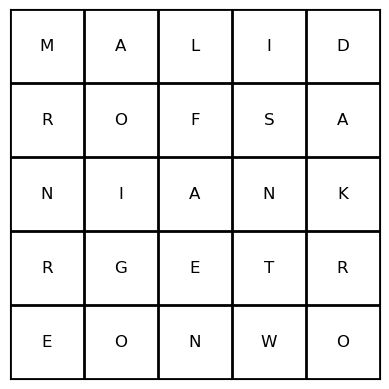

In [7]:
fig, ax = plt.subplots()
# Ensure the axes are kept square to avoid distortion
ax.set_aspect('equal')

# Set the background to white
ax.set_facecolor('white')

# Plotting each cell with text, ensuring the grid is not inverted
for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        ax.text(j, i, grid[i, j], ha='center', va='center', color='black', fontsize=12)

# Setting the ticks to appear at every cell boundary
ax.set_xticks(np.arange(-0.5, len(grid[0]), 1), minor=True)
ax.set_yticks(np.arange(-0.5, len(grid), 1), minor=True)

# Setting gridlines based on these minor ticks
ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
ax.tick_params(which='both', top=False, left=False, right=False, bottom=False, labelbottom=False, labelleft=False)

# Limit the axis to the grid size
ax.set_xlim(-0.5, len(grid[0])-0.5)
ax.set_ylim(-0.5, len(grid)-0.5)
ax.invert_yaxis()  # Ensure the first row of the data appears at the top of the plot

# Show the plot
plt.show()

In [8]:
# Find all the states in the grid

visited = set()

@ cache
def solve(word, i, j, has_missing):
    if i < 0 or i > 4 or j < 0 or j > 4:
        return False
    if len(word) == 1:
        if not has_missing or grid[i, j] == word:
            return True
        else:
            return False
    directions = [(-1, 0), (-1, -1), (0, -1), (1, -1), (-1, 1), (0, 1), (1, 0), (1, 1)]
    if grid[i, j] == word[0]:
        for direction in directions:
            if solve(word[1:], i + direction[0], j + direction[1], has_missing):
                return True
    if not has_missing:
        for direction in directions:
            if solve(word[1:], i + direction[0], j + direction[1], True):
                return True
    return False

for i in range(len(grid)):
    for j in range(len(grid[0])):
        for word in scores.keys():
            if word in visited:
                continue
            if solve(word.upper().replace(' ', ''), i, j, False):
                visited.add(word)

visited

{'Alabama',
 'Alaska',
 'Arkansas',
 'California',
 'Florida',
 'Georgia',
 'Indiana',
 'Iowa',
 'Kansas',
 'Louisiana',
 'Maine',
 'Montana',
 'Nevada',
 'New York',
 'Ohio',
 'Oregon',
 'Texas',
 'Virginia'}

In [9]:
# Check the total score

total_score = 0
for state in visited:
    total_score += scores[state]
total_score

177695095

In [10]:
res = ''
for i in range(len(grid)):
    for j in range(len(grid[0])):
        res += grid[i, j]
res

'MALIDROFSANIANKRGETREONWO'

And below is a 20S - 4C - C2C solution

In [11]:
grid = np.array(
    [
        ['M', 'A', 'L', 'A', 'P'],
        ['R', 'O', 'F', 'I', 'S'],
        ['I', 'N', 'C', 'M', 'S'],
        ['A', 'S', 'E', 'N', 'O'],
        ['H', 'T', 'X', 'I', 'C']
    ]
)

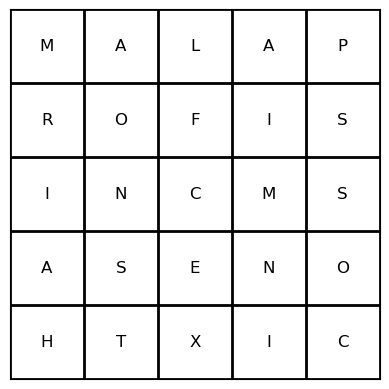

In [12]:
fig, ax = plt.subplots()
# Ensure the axes are kept square to avoid distortion
ax.set_aspect('equal')

# Set the background to white
ax.set_facecolor('white')

# Plotting each cell with text, ensuring the grid is not inverted
for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        ax.text(j, i, grid[i, j], ha='center', va='center', color='black', fontsize=12)

# Setting the ticks to appear at every cell boundary
ax.set_xticks(np.arange(-0.5, len(grid[0]), 1), minor=True)
ax.set_yticks(np.arange(-0.5, len(grid), 1), minor=True)

# Setting gridlines based on these minor ticks
ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
ax.tick_params(which='both', top=False, left=False, right=False, bottom=False, labelbottom=False, labelleft=False)

# Limit the axis to the grid size
ax.set_xlim(-0.5, len(grid[0])-0.5)
ax.set_ylim(-0.5, len(grid)-0.5)
ax.invert_yaxis()  # Ensure the first row of the data appears at the top of the plot

# Show the plot
plt.show()

In [13]:
visited = set()

@ cache
def solve(word, i, j, has_missing):
    if i < 0 or i > 4 or j < 0 or j > 4:
        return False
    if len(word) == 1:
        if not has_missing or grid[i, j] == word:
            return True
        else:
            return False
    directions = [(-1, 0), (-1, -1), (0, -1), (1, -1), (-1, 1), (0, 1), (1, 0), (1, 1)]
    if grid[i, j] == word[0]:
        for direction in directions:
            if solve(word[1:], i + direction[0], j + direction[1], has_missing):
                return True
    if not has_missing:
        for direction in directions:
            if solve(word[1:], i + direction[0], j + direction[1], True):
                return True
    return False

for i in range(len(grid)):
    for j in range(len(grid[0])):
        for word in scores.keys():
            if word in visited:
                continue
            if solve(word.upper().replace(' ', ''), i, j, False):
                visited.add(word)

In [14]:
visited

{'Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Florida',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Louisiana',
 'Maine',
 'Mississippi',
 'Montana',
 'New Mexico',
 'Ohio',
 'Texas',
 'Utah',
 'Wisconsin'}

In [15]:
len(visited)

20

In [16]:
total_score = 0
for state in visited:
    total_score += scores[state]
total_score

170790534

In [17]:
res = ''
for i in range(len(grid)):
    for j in range(len(grid[0])):
        res += grid[i, j]
res

'MALAPROFISINCMSASENOHTXIC'